In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

from IPython.display import display, Image


import cv2


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/107.7 GB disk)


In [ ]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,720 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3

In [ ]:
! pip install pytesseract

In [ ]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO
import numpy as np

In [ ]:
!pip install roboflow --quiet
from roboflow import Roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
import torch
model = torch.load('model.pth')

In [ ]:
import os, random
img = "/content/cheque.png"
print("running inference on " + img)
pred = model.predict(img, confidence=6, overlap=30).json()
pred

running inference on /content/cheque.png


{'predictions': [{'x': 239,
   'y': 55,
   'width': 339,
   'height': 67,
   'confidence': 0.3791777789592743,
   'class': 'bank detai-',
   'image_path': '/content/cheque.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 719,
   'y': 54,
   'width': 204,
   'height': 64,
   'confidence': 0.08181822299957275,
   'class': 'Date',
   'image_path': '/content/cheque.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 398,
   'y': 362,
   'width': 416,
   'height': 55,
   'confidence': 0.07632187008857727,
   'class': 'micr',
   'image_path': '/content/cheque.png',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '850', 'height': '424'}}

In [ ]:
import cv2
img = cv2.imread('cheque.png')

In [ ]:
predictions = pred['predictions']

for prediction in predictions:
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']
    class_label = prediction['class']
    confidence = prediction['confidence']

    x = int(x)
    y = int(y)
    width = int(width)
    height = int(height)

    print('Bounding Box:', (x, y, width, height))
    print('Confidence:', confidence)
    print('Class Label:', class_label)



Bounding Box: (239, 55, 339, 67)
Confidence: 0.3791777789592743
Class Label: bank detai-
Bounding Box: (719, 54, 204, 64)
Confidence: 0.08181822299957275
Class Label: Date
Bounding Box: (398, 362, 416, 55)
Confidence: 0.07632187008857727
Class Label: micr


In [ ]:

def xywh2xyxy(x):
    """
    Convert bounding box coordinates from (x, y, width, height) format to (x1, y1, x2, y2) format where (x1, y1) is the
    top-left corner and (x2, y2) is the bottom-right corner.

    Args:
        x (np.ndarray | torch.Tensor | list): The input bounding box coordinates in (x, y, width, height) format.
    Returns:
        y (np.ndarray | torch.Tensor): The bounding box coordinates in (x1, y1, x2, y2) format.
    """
    y = np.array(x) if isinstance(x, list) else x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[..., 0] = x[..., 0] - x[..., 2] / 2  # top left x
    y[..., 1] = x[..., 1] - x[..., 3] / 2  # top left y
    y[..., 2] = x[..., 0] + x[..., 2] / 2  # bottom right x
    y[..., 3] = x[..., 1] + x[..., 3] / 2  # bottom right y
    return y

Bounding Box: (239, 55, 339, 67)
Confidence: 0.3791777789592743
Class Label: bank detai-
Bounding Box: (719, 54, 204, 64)
Confidence: 0.08181822299957275
Class Label: Date
Bounding Box: (398, 362, 416, 55)
Confidence: 0.07632187008857727
Class Label: micr


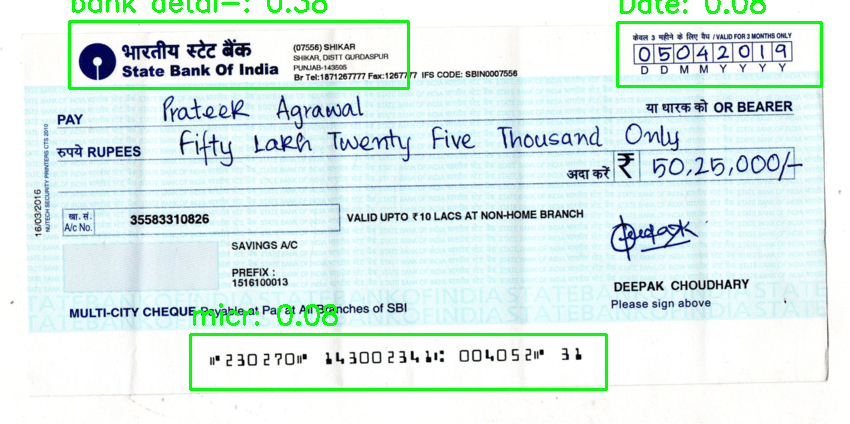

In [ ]:
predictions = pred['predictions']

for prediction in predictions:
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']
    class_label = prediction['class']
    confidence = prediction['confidence']

    x = int(x)
    y = int(y)
    width = int(width)
    height = int(height)

    print('Bounding Box:', (x, y, width, height))
    print('Confidence:', confidence)
    print('Class Label:', class_label)

    # Convert bounding box coordinates to (x1, y1, x2, y2) format
    bbox = xywh2xyxy(torch.tensor([x, y, width, height]))

    x1, y1, x2, y2 = bbox.tolist()

    # Draw bounding box on the image
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Write class label and confidence on the image
    label = f'{class_label}: {confidence:.2f}'
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding boxes and labels
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
! ls -alrt /usr/bin/tesseract

-rwxr-xr-x 1 root root 35056 Mar  3  2020 /usr/bin/tesseract


In [ ]:
pytesseract.pytesseract.tessseract_cmd= r'/usr/bin/tesseract'
# By setting this value, you ensure that pytesseract knows where to find the Tesseract OCR engine for text recognition.

 **MICR**






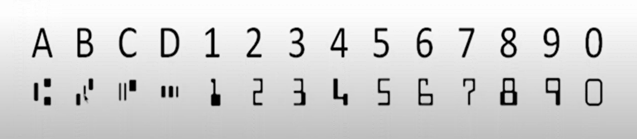

In [ ]:
! wget https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata

--2023-07-01 05:17:29--  https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147363 (144K) [application/octet-stream]
Saving to: ‘mcr.traineddata.1’

mcr.traineddata.1   100%[===================>] 143.91K  --.-KB/s    in 0.01s   

2023-07-01 05:17:29 (10.4 MB/s) - ‘mcr.traineddata.1’ saved [147363/147363]



In [ ]:
!cp mcr.traineddata /usr/share/tesseract-ocr/4.00/tessdata/


In [ ]:
!sudo apt-get install tesseract-ocr-hin

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-hin
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 913 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-hin all 1:4.00~git30-7274cfa-1 [913 kB]
Fetched 913 kB in 1s (1,273 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-hin.
(Reading databas

Bounding Box: (239, 55, 339, 67)
Confidence: 0.3791777789592743
Class Label: bank detai-
Bounding Box: (719, 54, 204, 64)
Confidence: 0.08181822299957275
Class Label: Date
Bounding Box: (398, 362, 416, 55)
Confidence: 0.07632187008857727
Class Label: micr



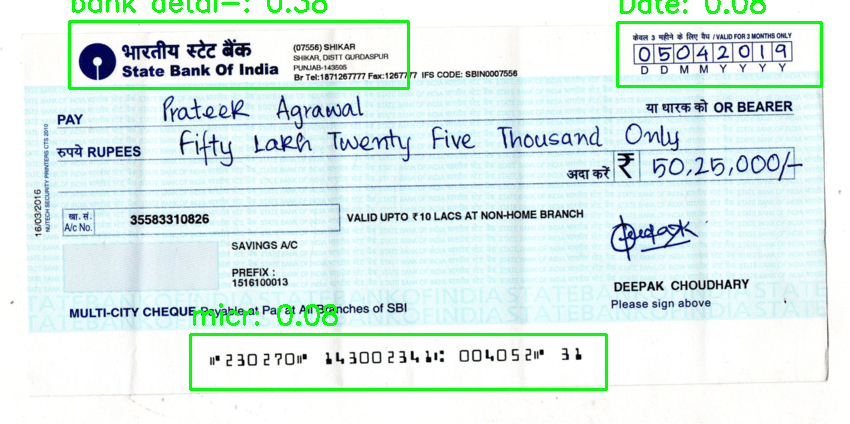

In [ ]:
import cv2
import torch
import numpy as np
from google.colab.patches import cv2_imshow

def xywh2xyxy(x):
    """
    Convert bounding box coordinates from (x, y, width, height) format to (x1, y1, x2, y2) format where (x1, y1) is the
    top-left corner and (x2, y2) is the bottom-right corner.

    Args:
        x (np.ndarray | torch.Tensor): The input bounding box coordinates in (x, y, width, height) format.
    Returns:
        y (np.ndarray | torch.Tensor): The bounding box coordinates in (x1, y1, x2, y2) format.
    """
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[..., 0] = x[..., 0] - x[..., 2] / 2  # top left x
    y[..., 1] = x[..., 1] - x[..., 3] / 2  # top left y
    y[..., 2] = x[..., 0] + x[..., 2] / 2  # bottom right x
    y[..., 3] = x[..., 1] + x[..., 3] / 2  # bottom right y
    return y

predictions = pred['predictions']

for prediction in predictions:
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']
    class_label = prediction['class']
    confidence = prediction['confidence']

    x = int(x)
    y = int(y)
    width = int(width)
    height = int(height)

    print('Bounding Box:', (x, y, width, height))
    print('Confidence:', confidence)
    print('Class Label:', class_label)

    # Convert bounding box coordinates to (x1, y1, x2, y2) format
    bbox = xywh2xyxy(torch.tensor([x, y, width, height]))

    x1, y1, x2, y2 = bbox.tolist()

    # Draw bounding box on the image
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Crop the bounding box region

    # if(class_label == 'micr'):
    #   crop = img[y1:y2, x1:x2]

    # Display the cropped image
      # cv2_imshow(crop)
      # cv2.waitKey(0)
      # cv2.destroyAllWindows()
      # print(pytesseract.image_to_string(crop,lang='eng'))

    label = f'{class_label}: {confidence:.2f}'
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding boxes and labels
print("")
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Bounding Box: (239, 55, 339, 67)
Confidence: 0.3791777789592743
Class Label: bank detai-


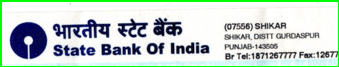

Bounding Box: (719, 54, 204, 64)
Confidence: 0.08181822299957275
Class Label: Date


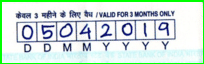

Bounding Box: (398, 362, 416, 55)
Confidence: 0.07632187008857727
Class Label: micr


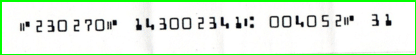

In [ ]:
predictions = pred['predictions']

for prediction in predictions:
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']
    class_label = prediction['class']
    confidence = prediction['confidence']

    x = int(x)
    y = int(y)
    width = int(width)
    height = int(height)

    print('Bounding Box:', (x, y, width, height))
    print('Confidence:', confidence)
    print('Class Label:', class_label)

    # Convert bounding box coordinates to (x1, y1, x2, y2) format
    bbox = xywh2xyxy(torch.tensor([x, y, width, height]))

    x1, y1, x2, y2 = bbox.tolist()

    # Draw bounding box on the image
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    crop = img[y1:y2, x1:x2]

    # Display the cropped image
    cv2_imshow(crop)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


    # Write class label and confidence on the image
    label = f'{class_label}: {confidence:.2f}'
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding boxes and labels
# from google.colab.patches import cv2_imshow
# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Class Label: bank detai-


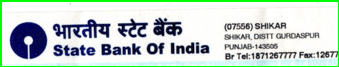

5 भारतीय स्टेट बैंक. cee,
State Bank Of India "orem

Class Label: micr


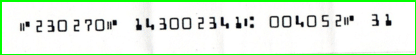

 

 

c 2 30 2 70c

14300 2341a

004052c 3 1

 

 



In [ ]:
import cv2
import torch
import numpy as np
from google.colab.patches import cv2_imshow


def xywh2xyxy(x):
    """
    Convert bounding box coordinates from (x, y, width, height) format to (x1, y1, x2, y2) format where (x1, y1) is the
    top-left corner and (x2, y2) is the bottom-right corner.

    Args:
        x (np.ndarray | torch.Tensor): The input bounding box coordinates in (x, y, width, height) format.
    Returns:
        y (np.ndarray | torch.Tensor): The bounding box coordinates in (x1, y1, x2, y2) format.
    """
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[..., 0] = x[..., 0] - x[..., 2] / 2  # top left x
    y[..., 1] = x[..., 1] - x[..., 3] / 2  # top left y
    y[..., 2] = x[..., 0] + x[..., 2] / 2  # bottom right x
    y[..., 3] = x[..., 1] + x[..., 3] / 2  # bottom right y
    return y

predictions = pred['predictions']

for prediction in predictions:
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']
    class_label = prediction['class']
    confidence = prediction['confidence']

    x = int(x)
    y = int(y)
    width = int(width)
    height = int(height)

    # print('Bounding Box:', (x, y, width, height))
    # print('Confidence:', confidence)
    # print('Class Label:', class_label)

    # Convert bounding box coordinates to (x1, y1, x2, y2) format
    bbox = xywh2xyxy(torch.tensor([x, y, width, height]))

    x1, y1, x2, y2 = bbox.tolist()

    # Draw bounding box on the image
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Crop the bounding box region

    if(class_label == 'micr'):
      crop = img[y1:y2, x1:x2]
      print('Class Label:', class_label)

    # Display the cropped image
      cv2_imshow(crop)
      cv2.waitKey(0)
      cv2.destroyAllWindows()
      print(pytesseract.image_to_string(crop,lang='mcr'))
      extracted_text= pytesseract.image_to_string(crop,lang='mcr')
    elif(class_label == 'bank detai-'):
      crop = img[y1:y2, x1:x2]
      print('Class Label:', class_label)

    # Display the cropped image
      cv2_imshow(crop)
      cv2.waitKey(0)
      cv2.destroyAllWindows()
      # print(pytesseract.image_to_string(crop,lang='hin'))
      # print(pytesseract.image_to_string(crop,lang='eng'))
      # hin=pytesseract.image_to_string(crop,lang='hin')
      # eng=pytesseract.image_to_string(crop,lang='eng')
      tessdata_dir_config = '--tessdata-dir "/usr/share/tesseract-ocr/4.00/tessdata" --psm 6 -l hin+eng'
      gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)


# Apply OCR on the image
      text = pytesseract.image_to_string(gray, config=tessdata_dir_config)
      print(text)


# Display the image with bounding boxes and labels

# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
extracted_text
new_text = extracted_text.replace(" ", "").lstrip()
for i in new_text:
  cheque_number= new_text[1:7]
  MICR=new_text[9:18].lstrip()

print('cheque_number:',cheque_number)
print('MICR code:',MICR)



cheque_number: 230270
MICR code: 14300234


In [ ]:
import re
def isValidMICRCode(str):

    regex = "^[0-9]{1,9}$"
    # Compile the ReGex
    p = re.compile(regex)

    # If the string is empty
    # return false
    if (str == None):
        return False

    # Return if the string
    # matched the ReGex
    if(re.search(p, str)):
        print('Valid')
    else:
      print('Not Valid')


print('The extracted MICR code from the cheque is ',end="")
isValidMICRCode(MICR)
print('The bank details ',text,' are also valid')


The extracted MICR code from the cheque is Valid
The bank details  5 भारतीय स्टेट बैंक. cee,
State Bank Of India "orem
  are also valid
